In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn .preprocessing import StandardScaler, scale 
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
zoo = pd.read_csv('Zoo.csv')
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [7]:
zoo1 = zoo.copy()

In [18]:
zoo1 = zoo1.drop(['animal name'],axis=1)

In [20]:
x = zoo1.iloc[:,:16]

In [14]:
y = zoo1['type']

In [15]:
# checking the value for k

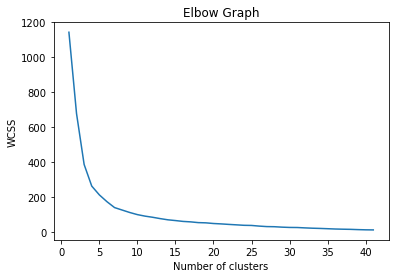

In [21]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,42):
    kmeans=KMeans(n_clusters=i,random_state=23)
    kmeans.fit(zoo1)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,42),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
# it seems like 7 or 8 could be optimum value for k

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.20)

## KNN Model

In [24]:
num_folds = 10
kfold = KFold(n_splits =10)

In [41]:
# When k=7
model = KNeighborsClassifier(n_neighbors = 7)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [42]:
y_train_pred = model.predict(x_train)

In [43]:
matrix = confusion_matrix(y_train,y_train_pred)
matrix

array([[29,  0,  0,  2,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  3,  1,  0,  0],
       [ 0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  1,  0,  7]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           1       0.97      0.94      0.95        31
           2       1.00      1.00      1.00        14
           3       0.00      0.00      0.00         5
           4       0.69      1.00      0.81        11
           5       0.67      1.00      0.80         4
           6       1.00      1.00      1.00         7
           7       1.00      0.88      0.93         8

    accuracy                           0.90        80
   macro avg       0.76      0.83      0.79        80
weighted avg       0.86      0.90      0.88        80



In [45]:
results = cross_val_score(model,x_train,y_train,cv=kfold)
print(results.mean())

0.8


In [50]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

1    9
2    6
6    3
4    3
dtype: int64

In [51]:
pd.crosstab(y_test,preds)

col_0,1,2,4,6
type,,,,
1,9,0,1,0
2,0,6,0,0
4,0,0,2,0
6,0,0,0,1
7,0,0,0,2


In [53]:
# Accuracy
np.mean(preds==y_test)

0.8571428571428571

In [35]:
# When k=8 

In [46]:
model_2 = KNeighborsClassifier(n_neighbors = 8)
results = cross_val_score(model_2,x_train,y_train,cv=kfold)
print(results.mean())

0.7875
